In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

current_dir = os.getcwd()

data_paths = {
    "energies": os.path.join(current_dir, "data", "energies.npy"),
    "2-body": os.path.join(current_dir, "data", "features_2b.npy"),
    "3-body": os.path.join(current_dir, "data", "features_3b.npy"),
    "4-body": os.path.join(current_dir, "data", "features_4b.npy"),
}

def load_data_standardized(feature_choice):
    """
    Dynamically load data based on the feature choice.
    Options:
    - "2-body": Use 2-body features only
    - "3-body": Use 3-body features only
    - "4-body": Use 4-body features only
    - "2+3-body": Combine 2-body and 3-body features
    - "3+4-body": Combine 3-body and 4-body features
    - "2+3+4-body": Combine all features
    """
    energies = np.load(data_paths["energies"])

    if feature_choice == "2-body":
        features = np.load(data_paths["2-body"])
        features = (features - features.mean())/features.std()
    elif feature_choice == "3-body":
        features = np.load(data_paths["3-body"])
        features = (features - features.mean())/features.std()
    elif feature_choice == "4-body":
        features = np.load(data_paths["4-body"])
        features = (features - features.mean())/features.std()
    elif feature_choice == "2+3-body":
        features_2 = np.load(data_paths["2-body"])
        features_2 =(features_2 - features_2.mean())/features_2.std()
        features_3 = np.load(data_paths["3-body"])
        features_3 = (features_3 - features_3.mean())/features_3.std()
        features = np.hstack((features_2, features_3))
    elif feature_choice == "3+4-body":
        features_4 = np.load(data_paths["4-body"])
        features_4 = (features_4 - features_4.mean())/features_4.std()
        features_3 = np.load(data_paths["3-body"])
        features_3 = (features_3 - features_3.mean())/features_3.std()
        features = np.hstack((features_4, features_3))
    elif feature_choice == "2+3+4-body":
        features_2 = np.load(data_paths["2-body"])
        features_2 = (features_2 - features_2.mean())/features_2.std()
        features_3 = np.load(data_paths["3-body"])
        features_3 = (features_3 - features_3.mean())/features_3.std()
        features_4 = np.load(data_paths["4-body"])
        features_4 = (features_4 - features_4.mean())/features_4.std()
        features = np.hstack((features_2, features_3, features_4))
    else:
        raise ValueError("Invalid feature choice!")

    energies = (energies - energies.mean())/energies.std()
    
    return features, energies

In [2]:
data, energies = load_data_standardized('3-body')


3.1.1 Sample selection

(120000, 1584)
(120000,)
[    10    105   1095  11465 120000]
CUR with n = : 10 done
FPS with n = : 10 done


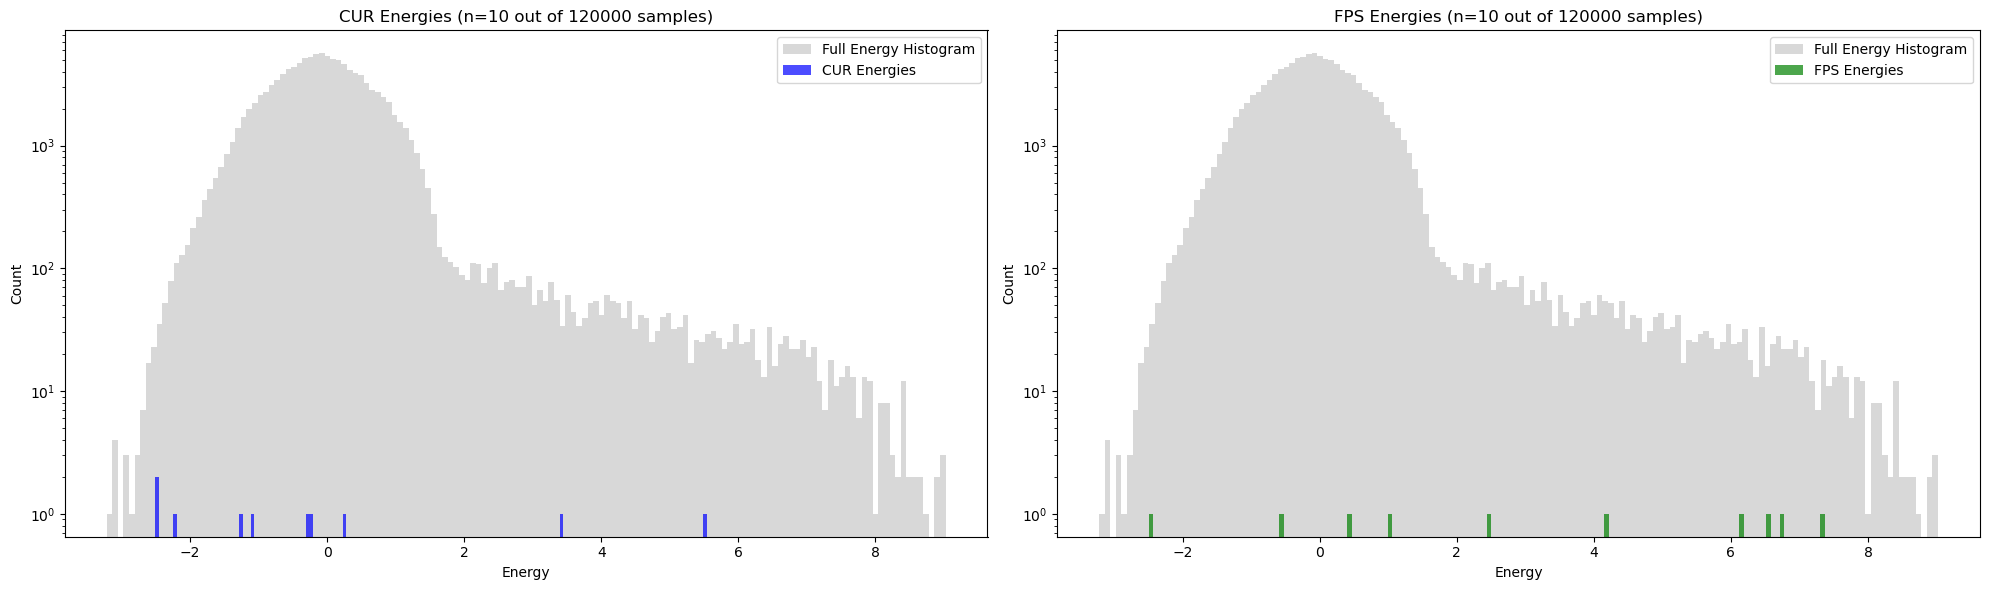

CUR with n = : 105 done
FPS with n = : 105 done


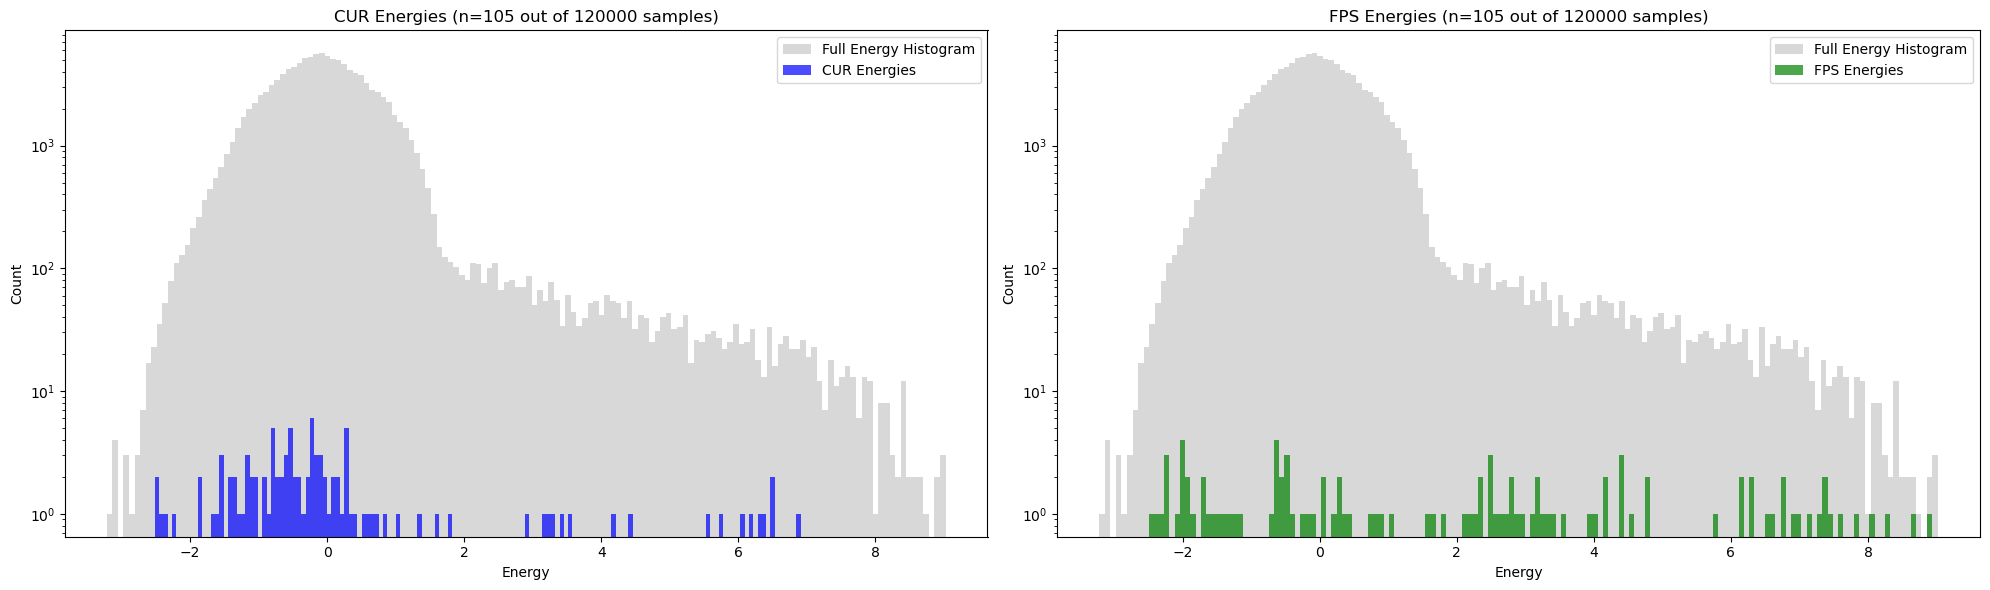

KeyboardInterrupt: 

In [3]:
from skmatter.feature_selection import CUR, FPS, PCovCUR, PCovFPS

#a random subset because it takes too much time otherwise
np.random.seed(42)
num_samples = 120000
indices = np.random.randint(0, len(data), size=num_samples)
data_subsample = data[indices]
energies_subsample = energies[indices]

print(data_subsample.shape)
print(energies_subsample.shape)

#n to select
n_to_select_values = np.rint(np.logspace(1, np.log10(num_samples), 5)).astype(int)
print(n_to_select_values)


for n_to_select_value in n_to_select_values:
    #CUR
    selector = CUR(n_to_select = n_to_select_value)
    selector.fit(data_subsample.T)
    cur_energies = energies_subsample[selector.selected_idx_]
    print(f"CUR with n = : {n_to_select_value} done")
    
    #FPS
    selector = FPS(n_to_select = n_to_select_value)
    selector.fit(data_subsample.T)
    fps_energies = energies_subsample[selector.selected_idx_]
    print(f"FPS with n = : {n_to_select_value} done")

    # Plot histograms
    plt.figure(figsize=(20, 6))
    
    # Histogram for CUR
    plt.subplot(1, 2, 1)
    plt.hist(energies_subsample, bins=150, color='gray', alpha=0.3, label='Full Energy Histogram')  # Full histogram
    plt.hist(cur_energies, bins=150, color='blue', alpha=0.7, label='CUR Energies')
    plt.title(f'CUR Energies (n={n_to_select_value} out of {num_samples} samples)')
    plt.xlabel('Energy')
    plt.ylabel('Count')
    plt.yscale("log")
    plt.legend()
    
    # Histogram for FPS
    plt.subplot(1, 2, 2)
    plt.hist(energies_subsample, bins=150, color='gray', alpha=0.3, label='Full Energy Histogram')  # Full histogram
    plt.hist(fps_energies, bins=150, color='green', alpha=0.7, label='FPS Energies')
    plt.title(f'FPS Energies (n={n_to_select_value} out of {num_samples} samples)')
    plt.xlabel('Energy')
    plt.ylabel('Count')
    plt.yscale("log")
    plt.legend()
    
    # Show the plots for this n_to_select_value
    plt.tight_layout()
    plt.savefig(f'sample_selection_{n_to_select_value}_out_of_{num_samples}.png')
    plt.show()


In [8]:
data.shape

(120000, 1584)

3.1.2 Feature Selection

(10000, 1584)
(10000,)
[  10   18   31   54   95  167  293  514  902 1584]


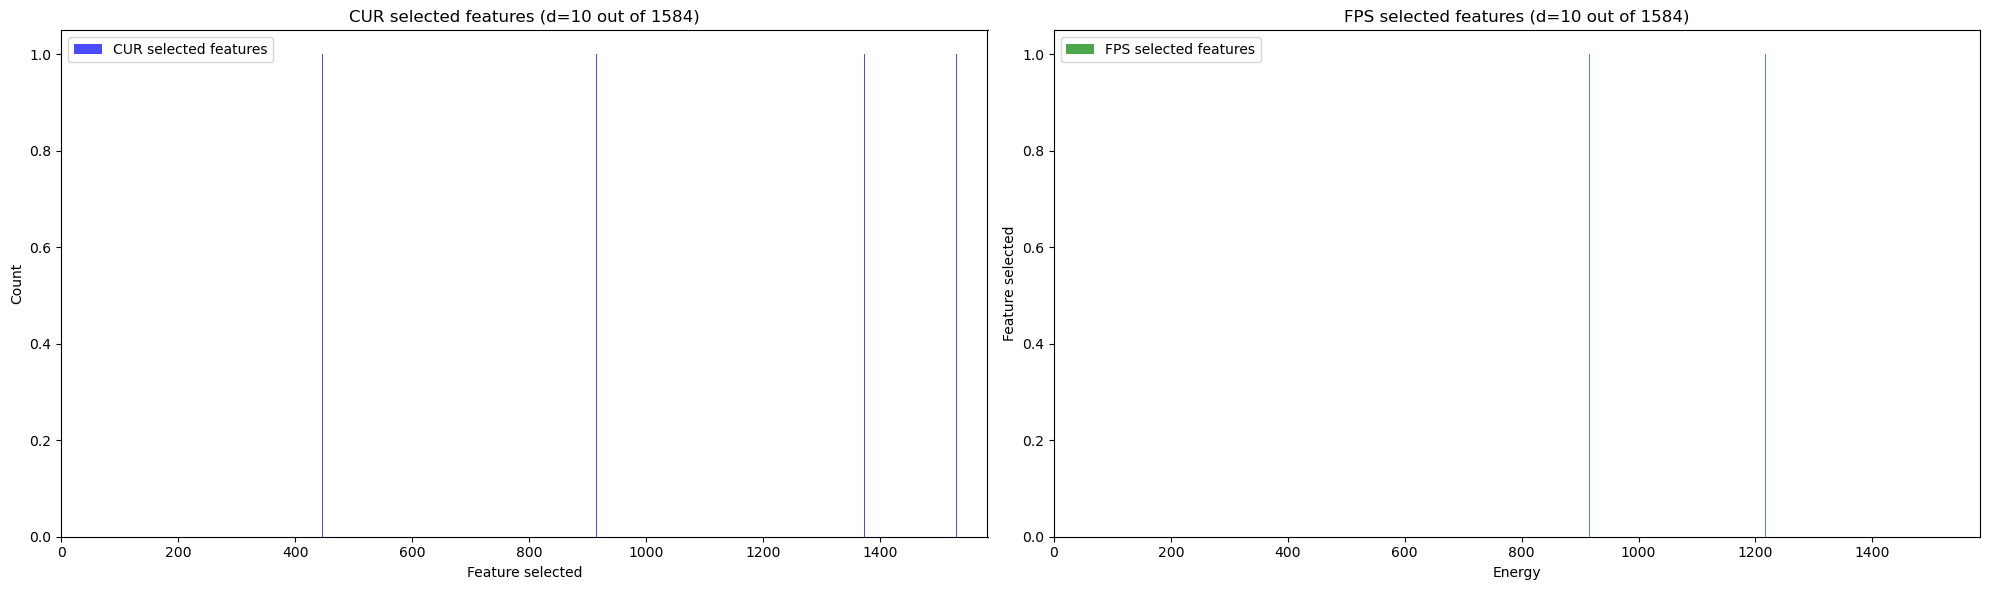

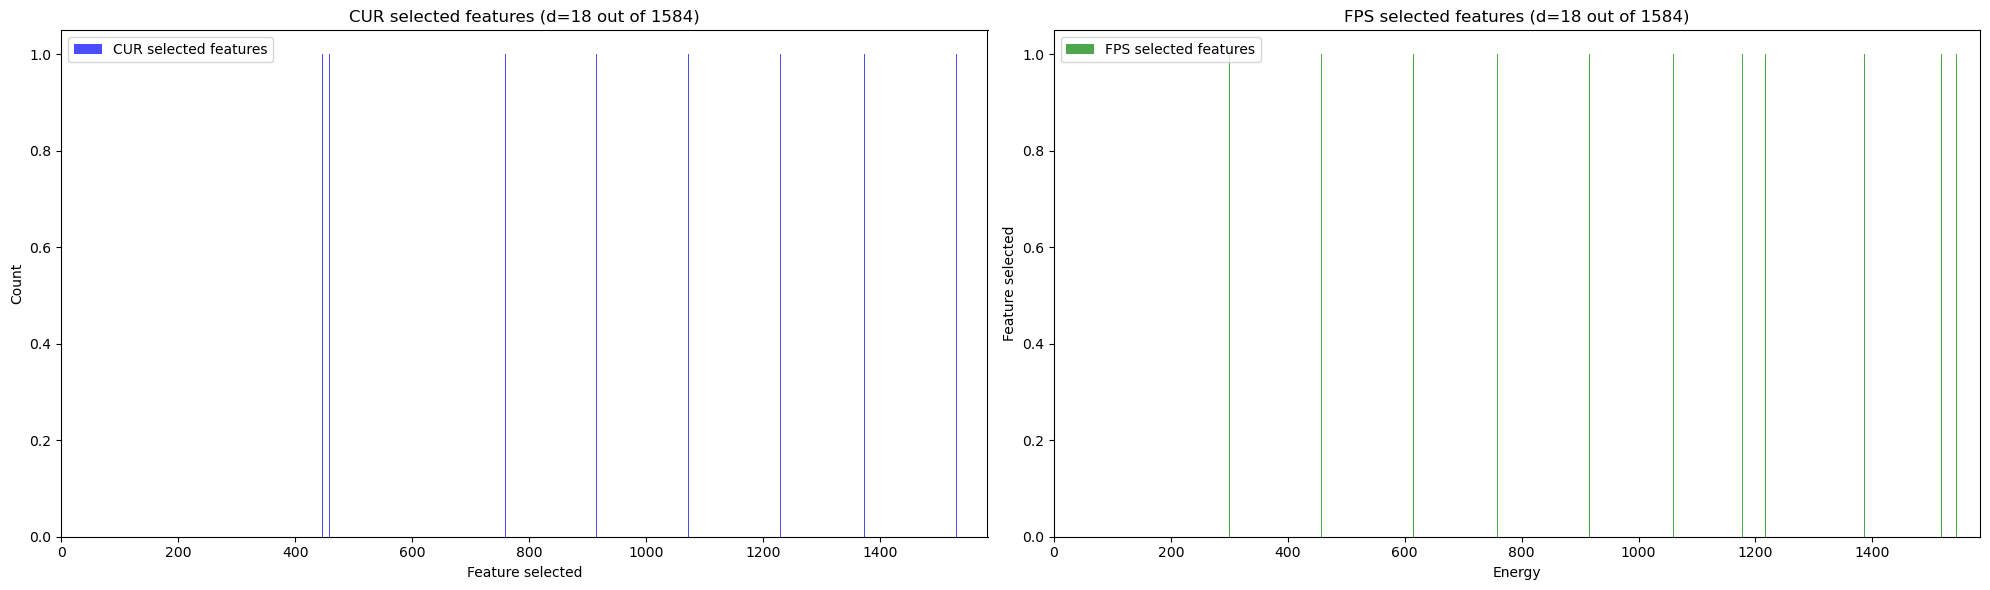

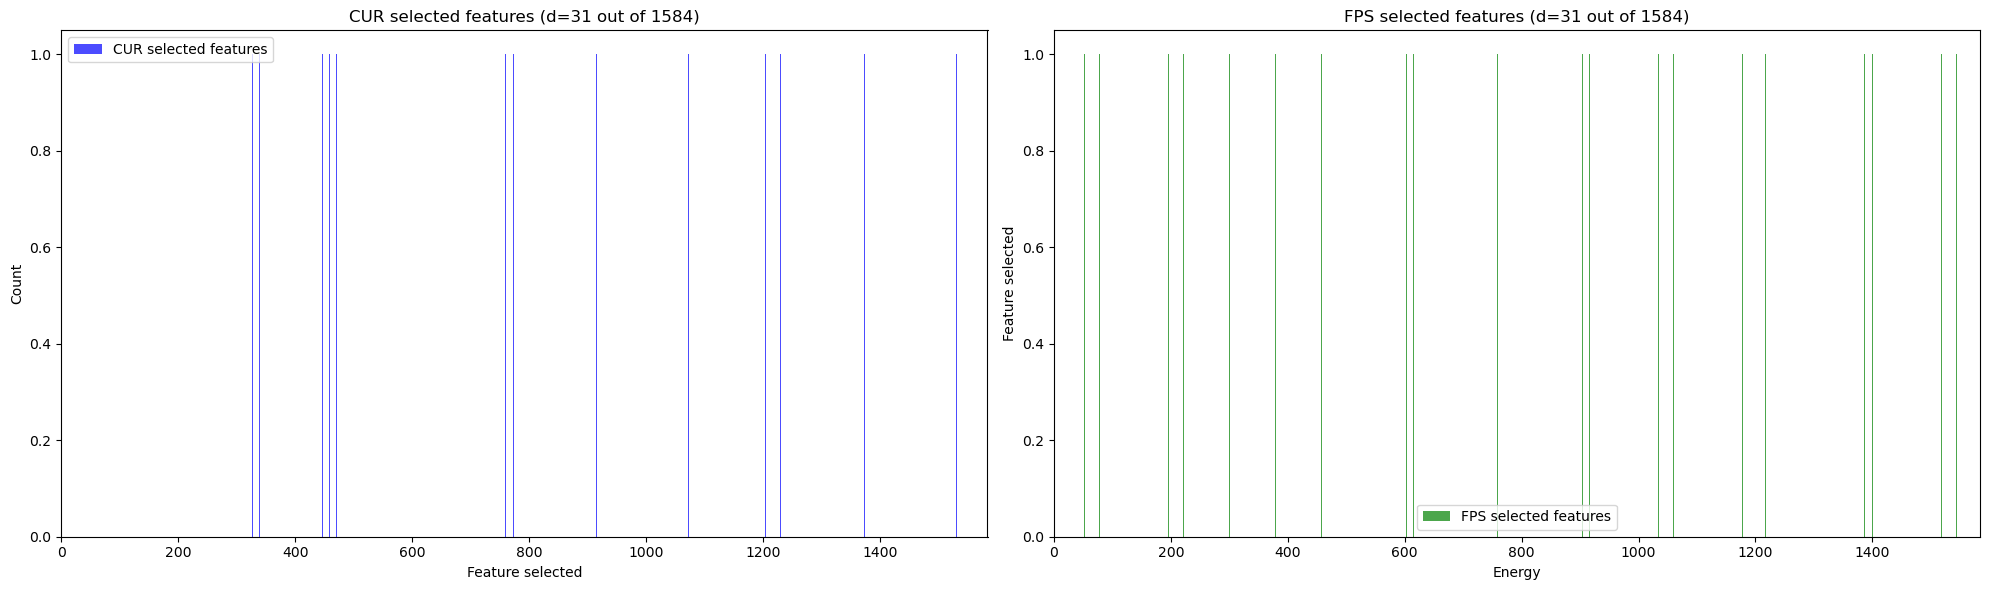

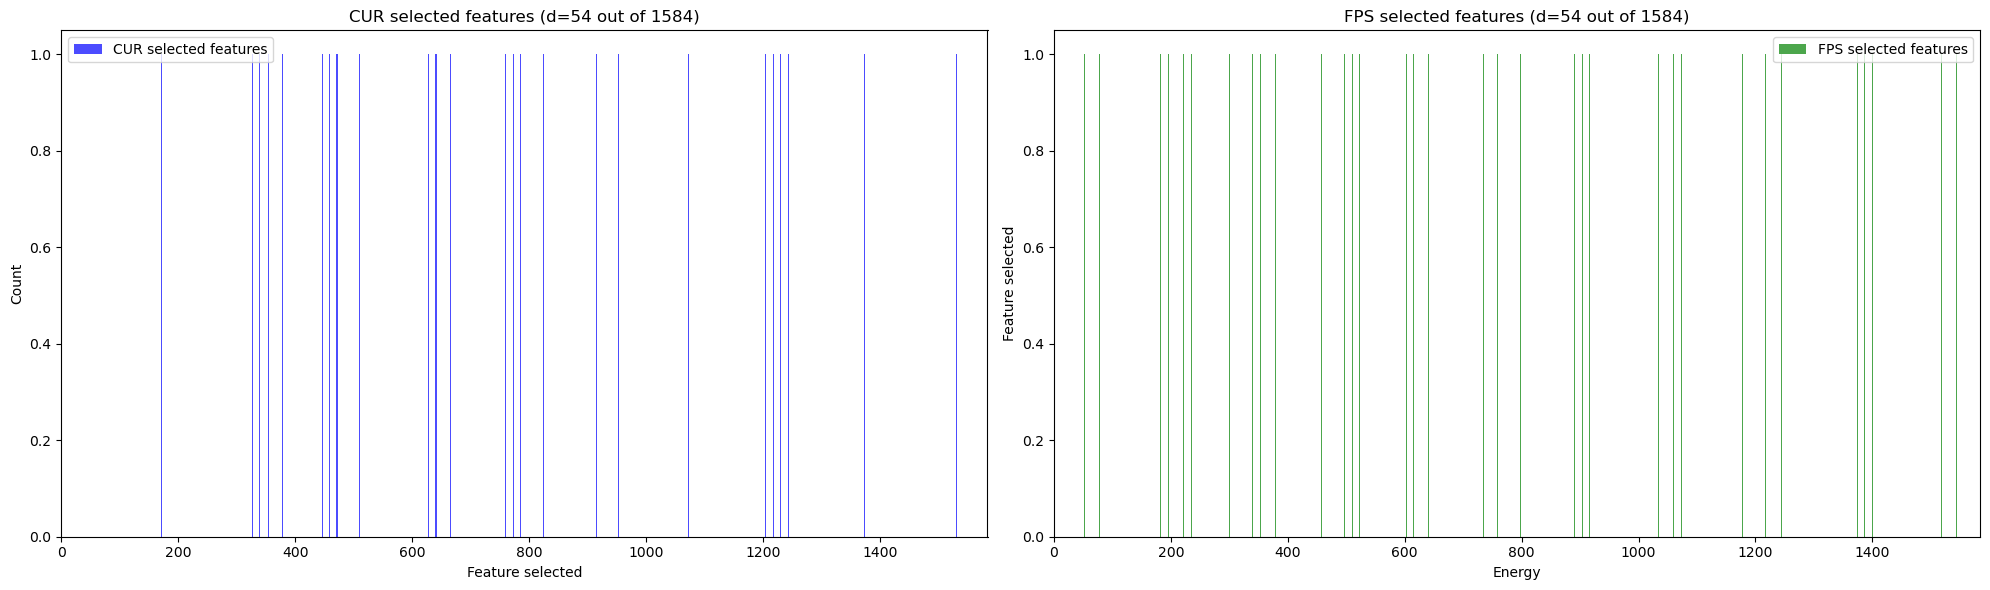

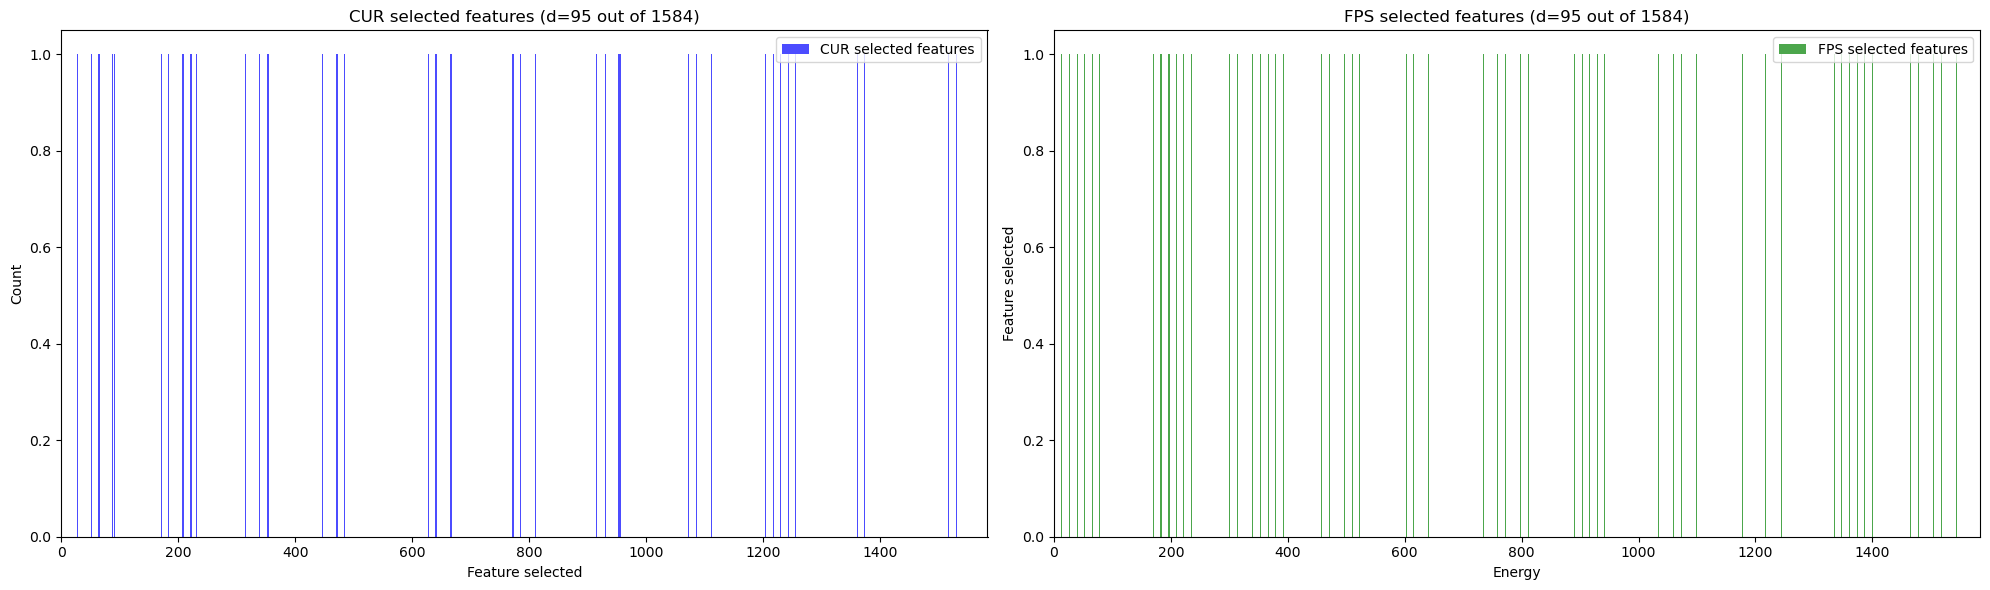

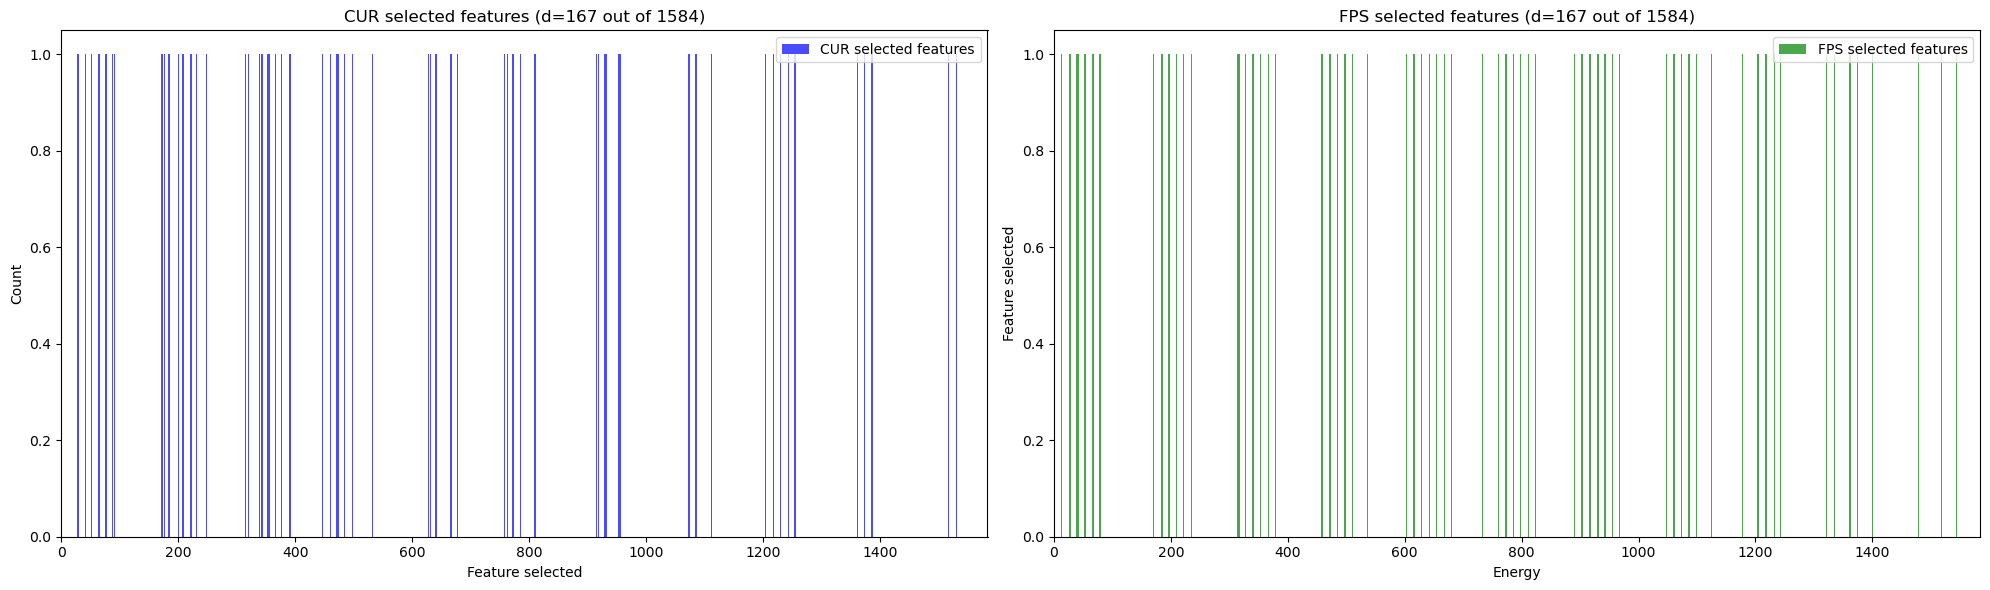

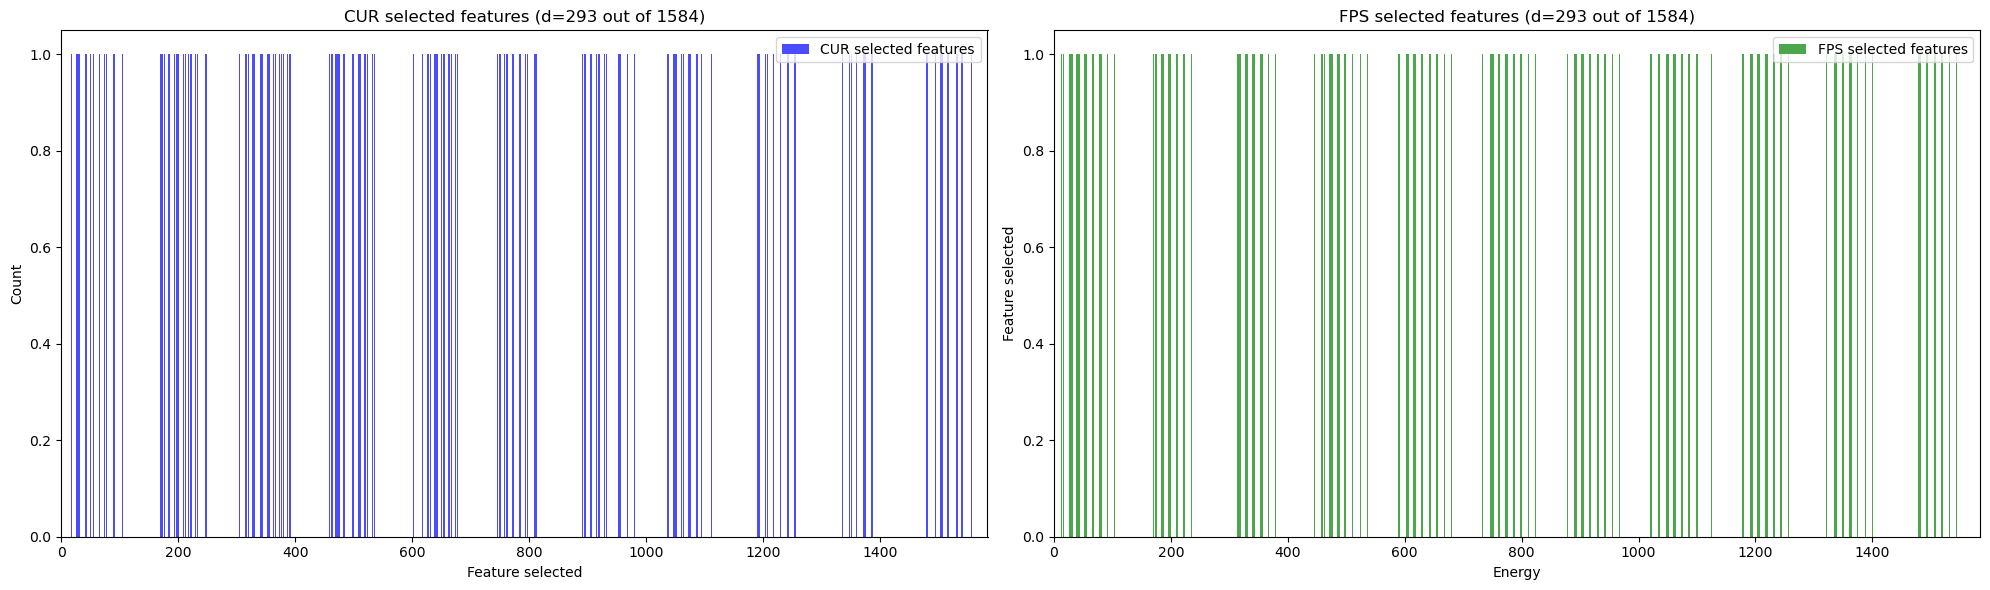

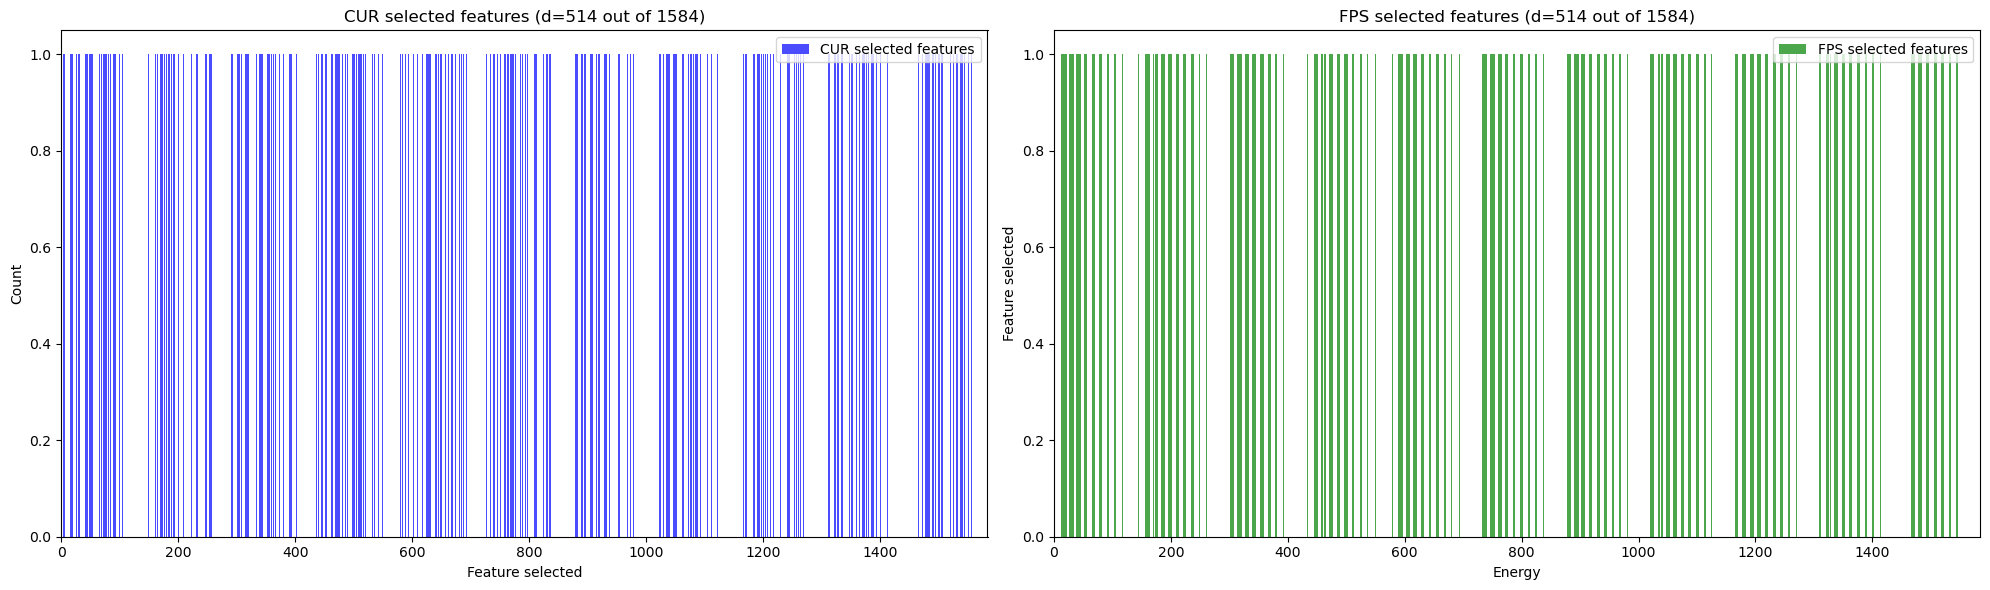

/home/appa/Anaconda3/envs/project2/lib/python3.9/site-packages/skmatter/utils/_orthogonalizers.py:57: UserWarning: Column vector contains only zeros.
  warnings.warn("Column vector contains only zeros.", stacklevel=1)


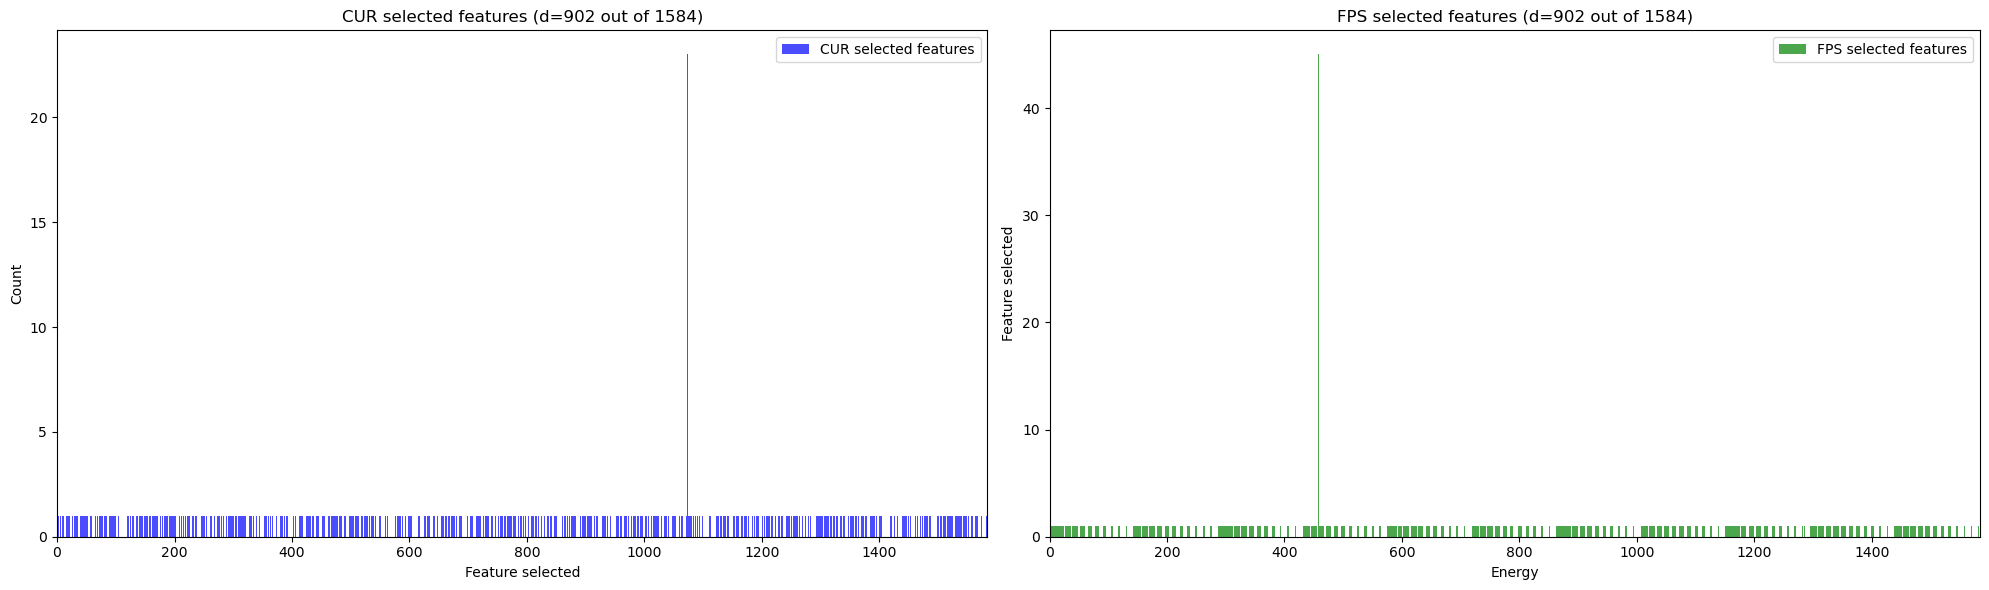

KeyboardInterrupt: 

In [14]:
#a random subset because it takes too much time otherwise
np.random.seed(42)
num_samples = 10000
indices = np.random.randint(0, len(data), size=num_samples)
data_subsample = data[indices]
energies_subsample = energies[indices]

print(data_subsample.shape)
print(energies_subsample.shape)

#n to select
n_to_select_values = np.rint(np.logspace(1, np.log10(data.shape[1]), 10)).astype(int)
print(n_to_select_values)


for n_to_select_value in n_to_select_values:
    #CUR
    selector = CUR(n_to_select = n_to_select_value)
    selector.fit(data_subsample, energies_subsample)
    cur_features = selector.selected_idx_

    #FPS
    selector = FPS(n_to_select = n_to_select_value)
    selector.fit(data_subsample, energies_subsample)
    fps_features = selector.selected_idx_

    # Plot histograms
    plt.figure(figsize=(20, 6))
    
    # Histogram for CUR
    plt.subplot(1, 2, 1)
    plt.hist(cur_features, bins=data.shape[1], color='blue', alpha=0.7, label='CUR selected features')
    plt.title(f'CUR selected features (d={n_to_select_value} out of {data.shape[1]})')
    plt.xlabel('Feature selected')
    plt.ylabel('Count')
    plt.xlim(0,data.shape[1])
    plt.legend()
    
    # Histogram for FPS
    plt.subplot(1, 2, 2)
    plt.hist(fps_features, bins=data.shape[1], color='green', alpha=0.7, label='FPS selected features')
    plt.title(f'FPS selected features (d={n_to_select_value} out of {data.shape[1]})')
    plt.xlabel('Energy')
    plt.ylabel('Feature selected')
    plt.xlim(0,data.shape[1])
    plt.legend()
    
    # Show the plots for this n_to_select_value
    plt.tight_layout()
    plt.savefig(f'feature_selection_{n_to_select_value}_with_n_{num_samples}.png')
    plt.show()

3.1.3

[0.001      0.00163789 0.0026827  0.00439397 0.00719686 0.01178769
 0.01930698 0.03162278 0.05179475 0.08483429 0.13894955 0.22758459
 0.37275937 0.61054023 1.        ]
d = 600 done
d = 1584 done


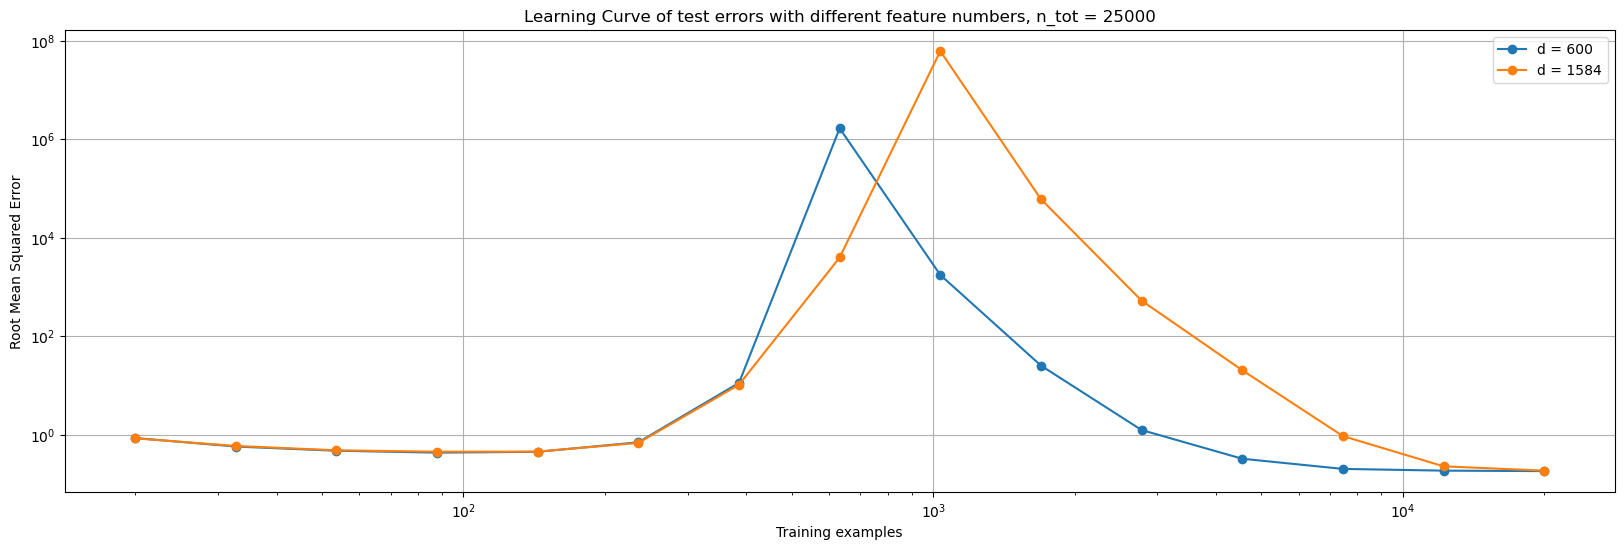

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from skmatter.feature_selection import CUR, FPS, PCovCUR, PCovFPS

def plot_learning_curve_different_d(model, X, y, feature_sizes, train_sizes, title="Learning Curve of test errors with different feature numbers"):
    # Plot
    plt.figure(figsize=(20, 6))
    
    np.random.seed(42)
    num_samples = 25000
    indices = np.random.randint(0, len(X), size=num_samples)
    X = X[indices]
    y = y[indices]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for f_size in feature_sizes:
        #CUR
        if f_size < X_train.shape[1] : 
            selector = CUR(n_to_select = f_size)
            selector.fit(X_train, y_train)
            X_train_f_selected = selector.transform(X_train)
            X_test_f_selected = selector.transform(X_test)
        else:
            X_train_f_selected = X_train
            X_test_f_selected = X_test
        
        test_errors = []
    
        for train_size in train_sizes:
            train_subset_size = int(train_size * len(X_train_f_selected))
            X_train_subset = X_train_f_selected[:train_subset_size]
            y_train_subset = y_train[:train_subset_size]
    
            model.fit(X_train_subset, y_train_subset)
    
            test_rmse = np.sqrt(np.mean((model.predict(X_test_f_selected) - y_test) ** 2))
            test_errors.append(test_rmse)

        plt.plot(train_sizes * len(X_train), test_errors, 'o-', label=f"d = {f_size}")
        print(f'd = {f_size} done')
    
    plt.title(f'Learning Curve of test errors with different feature numbers, n_tot = {num_samples}')
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Training examples")
    plt.ylabel("Root Mean Squared Error")
    plt.grid()
    plt.legend(loc="best")
    plt.savefig(f'learning_curve_different_features.png')
    plt.show()

n_to_select_values = [600, data.shape[1]]
#n_to_select_values = [10, 20, data.shape[1]]
train_sizes = np.logspace(np.log10(0.001), np.log10(1.0), 15)
print(train_sizes)

plot_learning_curve_different_d(LinearRegression(), data, energies, n_to_select_values, train_sizes)

#### 3.1.3
We can see that with lower Ntrain samples, lower Ds replicate the same test losses. This might lead to believe that if the test error of a certain d<D is at the same test error as D at the number of ntrains where the whole dataset stalls (at about 1400 training samples). In simpler terms: If we find a subset d where the testing error at ntrain = 1400 is the same as the whole set with D. We can use the subset d to have the best computing times.

#### 3.1.4
We can continue building models with d = 600, it won't affect the test RMSE

#### 3.1.5
Models that scale a lot in computing time the more features you have will also benefit with a reduction of features.